In [6]:
import numpy as np
import pandas as pd
import datetime

import os
for dirname, _, filenames in os.walk('e:\Course_Project/big_five_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import plot

style.use("seaborn-whitegrid")

e:\Course_Project/big_five_data\big_five_stocks.csv


In [9]:
df = pd.read_csv("e:\Course_Project/big_five_data/big_five_stocks.csv")

In [13]:
df.name.unique()

array(['^IXIC', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB'], dtype=object)

In [15]:
df["Unnamed: 0"] = pd.to_datetime(df["Unnamed: 0"])
df["year"] = df["Unnamed: 0"].dt.year
df["month"] = df["Unnamed: 0"].dt.month
df = df.rename({"Unnamed: 0" : "date"}, axis = 1, inplace = False)

In [16]:
sub_aapl = df[df.name == "AAPL"].drop("name", axis = 1)
sub_msft = df[df.name == "MSFT"].drop("name", axis = 1)
sub_amzn = df[df.name == "AMZN"].drop("name", axis = 1)
sub_googl = df[df.name == "GOOGL"].drop("name", axis = 1)
sub_fb = df[df.name == "FB"].drop("name", axis = 1)

sub_aapl.set_index("date", drop = True, inplace = True)
sub_msft.set_index("date", drop = True, inplace = True)
sub_amzn.set_index("date", drop = True, inplace = True)
sub_googl.set_index("date", drop = True, inplace = True)
sub_fb.set_index("date", drop = True, inplace = True)

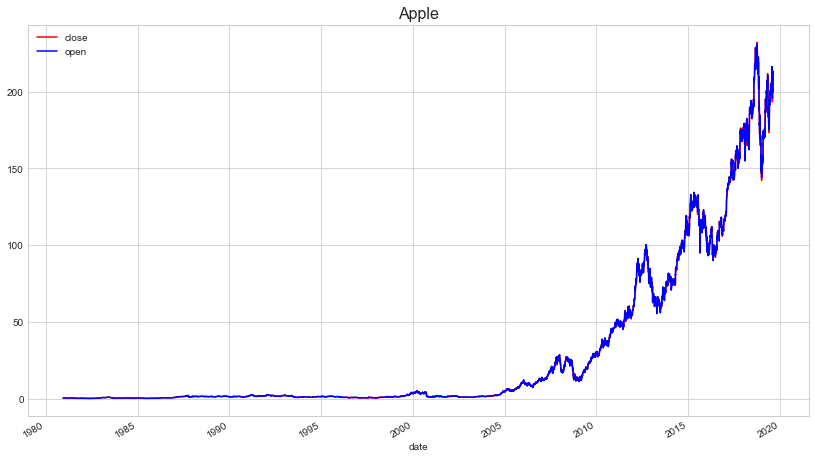

In [21]:
#Apple
plt.figure(figsize = (14,8))
sub_aapl["close"].plot(color = "red", label = "close")
sub_aapl["open"].plot(color = "blue", alpha = 1, label = "open")
plt.title("Apple", fontsize = 16)
plt.legend()
plt.show()

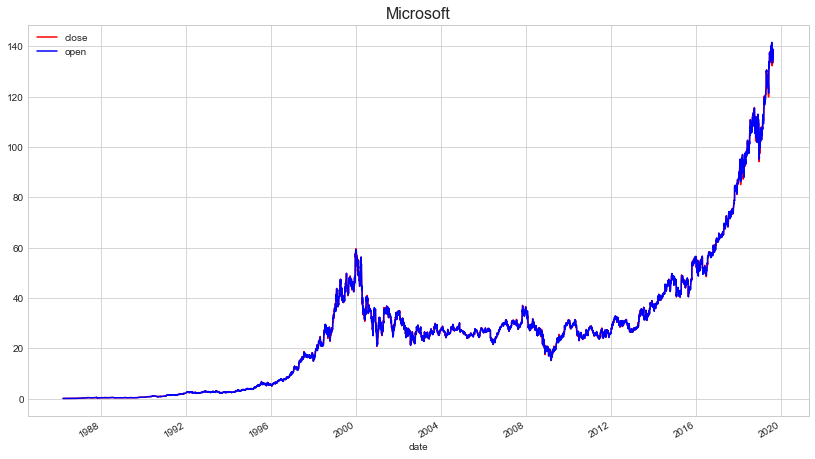

In [27]:
#Microsoft
plt.figure(figsize = (14,8))
sub_msft["close"].plot(color = "red", label = "close")
sub_msft["open"].plot(color = "blue", alpha = 1, label = "open")
plt.title("Microsoft", fontsize = 16)
plt.legend()
plt.show()

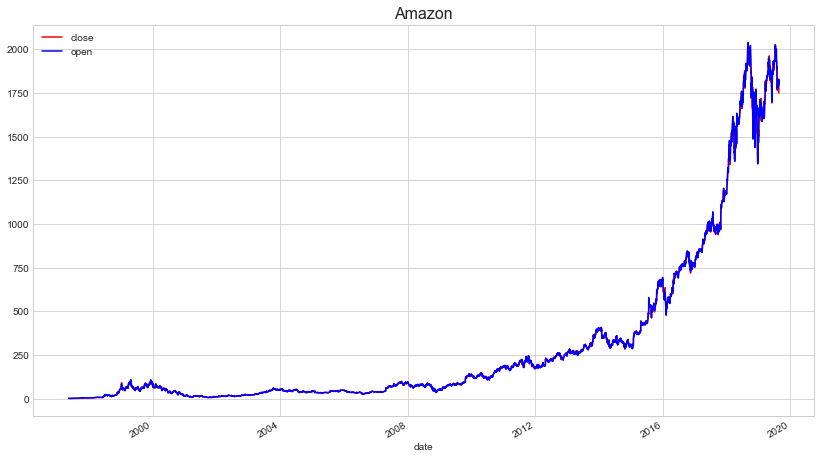

In [28]:
#Amazon
plt.figure(figsize = (14,8))
sub_amzn["close"].plot(color = "red", label = "close")
sub_amzn["open"].plot(color = "blue", alpha = 1, label = "open")
plt.title("Amazon", fontsize = 16)
plt.legend()
plt.show()

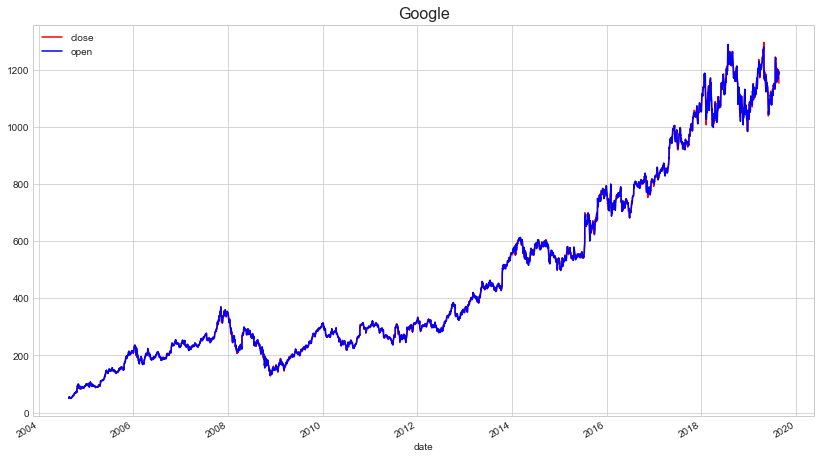

In [30]:
#Google
plt.figure(figsize = (14,8))
sub_googl["close"].plot(color = "red", label = "close")
sub_googl["open"].plot(color = "blue", alpha = 1, label = "open")
plt.title("Google", fontsize = 16)
plt.legend()
plt.show()

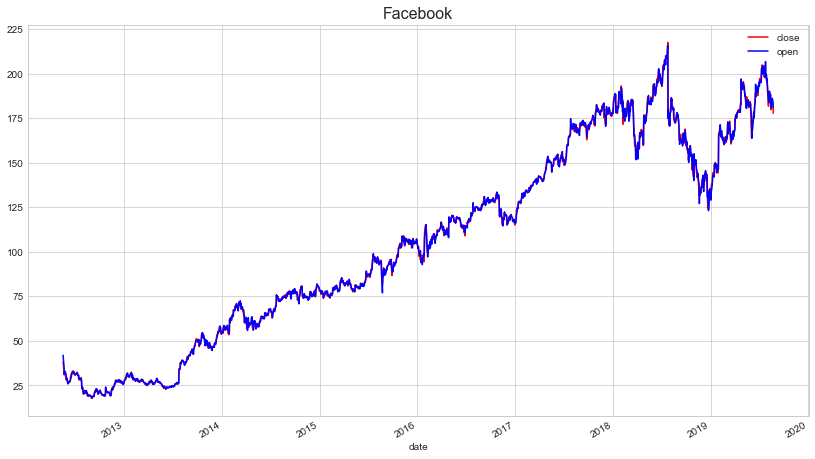

In [31]:
#Facebook
plt.figure(figsize = (14,8))
sub_fb["close"].plot(color = "red", label = "close")
sub_fb["open"].plot(color = "blue", alpha = 1, label = "open")
plt.title("Facebook", fontsize = 16)
plt.legend()
plt.show()

In [35]:
sub_aapl_year = df[(df.name == "AAPL") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_msft_year = df[(df.name == "MSFT") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_amzn_year = df[(df.name == "AMZN") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_googl_year = df[(df.name == "GOOGL") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)
sub_fb_year = df[(df.name == "FB") & (df.year >= 2015)].reset_index().drop(["name", "index"], axis = 1)

In [36]:
comp_stocks = pd.DataFrame({"AAPL" : sub_aapl_year["close"],
                            "GOOGL" : sub_googl_year["close"],
                            "AMZN" : sub_amzn_year["close"],
                            "MSFT" : sub_msft_year["close"],
                            "FB" : sub_fb_year["close"]})

In [66]:
comp_stocks.head(3)

,AAPL,GOOGL,AMZN,MSFT,FB
0,109.33,529.55,308.52,46.76,78.45
1,106.25,519.46,302.19,46.33,77.19
2,106.26,506.64,295.29,45.65,76.15


In [38]:
sub_returns = comp_stocks.apply(lambda x: x / x[0])
sub_returns["DATE"] = sub_aapl_year["date"]
sub_returns.set_index("DATE", drop = True, inplace = True)

In [39]:
sub_returns.head(3)

,AAPL,GOOGL,AMZN,MSFT,FB
DATE,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.971828,0.980946,0.979483,0.990804,0.983939
2015-01-06,0.971920,0.956737,0.957118,0.976262,0.970682


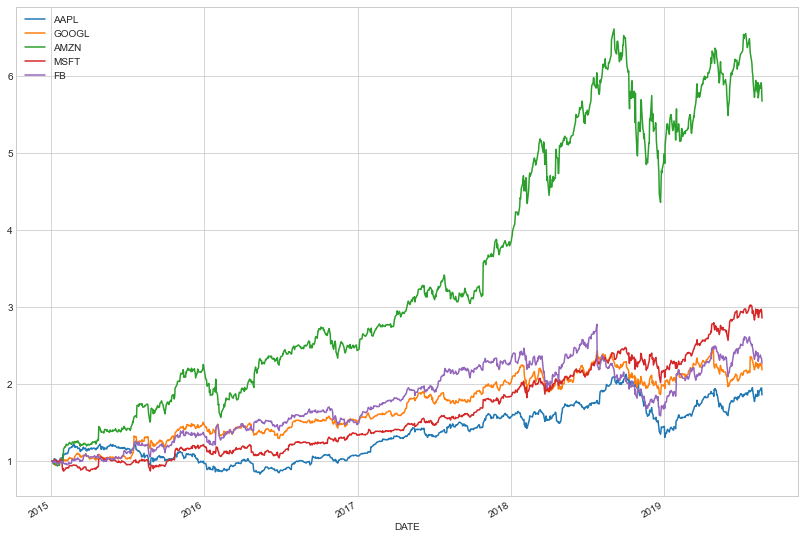

In [70]:
sub_returns.plot(figsize = (14,10))
plt.show()

<AxesSubplot:>

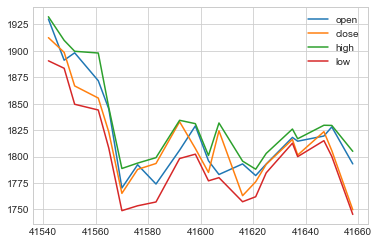

In [53]:
#Apple 
df[df['name'] == 'AMZN'][['open', 'close', 'high', 'low' ]].tail(60).plot()

<AxesSubplot:>

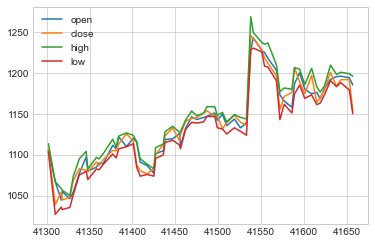

In [62]:
#Google
df[df['name'] == 'GOOGL'][['open', 'close', 'high', 'low' ]].tail(60).plot()

<AxesSubplot:>

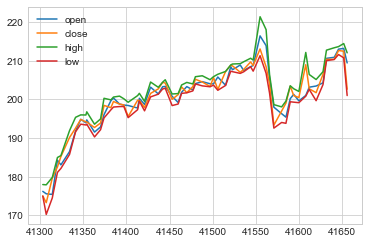

In [61]:
#Apple
df[df['name'] == 'AAPL'][['open', 'close', 'high', 'low' ]].tail(60).plot()

<AxesSubplot:>

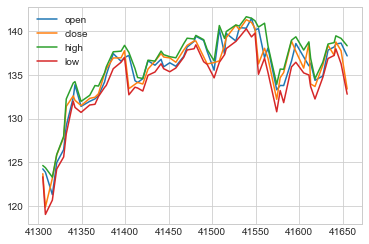

In [59]:
#Microsoft
df[df['name'] == 'MSFT'][['open', 'close', 'high', 'low' ]].tail(60).plot()

<AxesSubplot:>

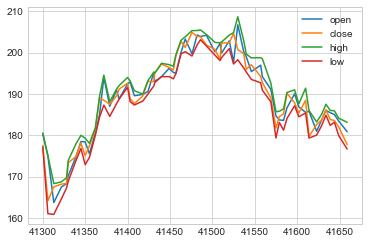

In [58]:
#Facebook
df[df['name'] == 'FB'][['open', 'close', 'high', 'low' ]].tail(60).plot()